# ------- 1. Libraries and File Paths -------

In [55]:
import pandas as pd
import os
import xarray as xr
import geopandas as gpd
import matplotlib.pyplot as plt
import rasterio
from rasterio.plot import show
import rioxarray as rxr
from dask.diagnostics import ProgressBar

In [56]:
# Setting file paths
base_dir = "/global/scratch/users/yougsanghvi"

# Paths for stagg aggregated files for a specific year
stagg_folder_path = os.path.join(base_dir, "aggregated_results_gdnat_usa")
stagg_filename = "gdnat_usa_agg_1979.csv"
stagg_data_path = os.path.join(stagg_folder_path, stagg_filename)

# Paths for stagg aggregated files for all years
stagg_filename_allyrs = "gdnat_usa_agg_all_years.csv"
stagg_data_path_allyrs = os.path.join(stagg_folder_path, stagg_filename_allyrs)

# Paths for raw Gdnat data
raw_foldername = "gdnat_tiff_files_by_yr"
raw_filename = "gdnat_1979.tif"
raw_filepath = os.path.join(base_dir, raw_foldername, raw_filename)

# Define paths for usa county shapefile
usa_county_dir = os.path.join(base_dir, "shapefiles")
usa_county_filename = "tl_2016_us_county_mortality.shp"
usa_county_path = os.path.join(usa_county_dir, usa_county_filename)

# Paths for raw gdnat data
data_dir_cullen = os.path.join(
    "/global",
    "scratch",
    "users",
    "cmolitor",
)

data_dir_gdnat = os.path.join(data_dir_cullen, "global_suicide")
gdnat_1_path = os.path.join(
    data_dir_gdnat,
    "climate_data",
    "gdnat_ACCESS-CM2_tas_1979-1999_v2025-02-11.zarr",
)

gdnat_2_path = os.path.join(
    data_dir_gdnat,
    "climate_data",
    "gdnat_ACCESS-CM2_tas_2000-2020_v2025-02-11.zarr",
)

# path to Maren's era5 degree days file

era5_dd_folderpath = os.path.join("data", "climatedata", "USA")
era5_dd_filename = "temp_degreedays_1986_1999_USA_ERA5_pop_weights.csv"
era5_dd_filepath = os.path.join(base_dir, era5_dd_folderpath, era5_dd_filename)

# ------- 2. Loading in Files -------

In [57]:
# Loading in county shapefile
usa_counties = gpd.read_file(usa_county_path)

In [58]:
# load file for all years combined
stagg_usa_data_allyrs = pd.read_csv(stagg_data_path_allyrs)

# Convert 'order_1' from monthly sum to approximate daily average
stagg_usa_data_allyrs["order_1_daily_avg"] = stagg_usa_data_allyrs["order_1"] / 30

# Summary statistics of the daily average
stagg_usa_data_allyrs

,year,month,poly_id,order_1,order_2,order_3,order_4,order_1_daily_avg
0,1979,1.0,USA.1.1_1,158.814365,1654.741608,19808.009713,2.746721e+05,5.293812
1,1979,2.0,USA.1.1_1,216.764644,2515.971735,34657.603576,5.238516e+05,7.225488
2,1979,3.0,USA.1.1_1,451.500318,7085.977789,117564.953892,2.028333e+06,15.050011
3,1979,4.0,USA.1.1_1,562.943206,10717.534714,206797.582781,4.039714e+06,18.764774
4,1979,5.0,USA.1.1_1,661.302793,14233.954373,308791.037713,6.745573e+06,22.043426
...,...,...,...,...,...,...,...,...
1571047,2020,8.0,USA.51.23_1,657.701321,14588.317797,333599.741465,7.811245e+06,21.923377
1571048,2020,9.0,USA.51.23_1,375.224280,5776.395082,95072.078203,1.659739e+06,12.507476
1571049,2020,10.0,USA.51.23_1,95.028564,2496.181591,17704.214776,4.242605e+05,3.167619
1571050,2020,11.0,USA.51.23_1,60.085026,996.307838,7669.912958,9.238767e+04,2.002834


In [67]:
# load file for specific year speficied in path before
stagg_usa_data = pd.read_csv(stagg_data_path)

# Convert 'order_1' from monthly sum to approximate daily average
stagg_usa_data['order_1_daily_avg'] = stagg_usa_data['order_1'] / 30

# ummary statistics of the daily average
print(stagg_usa_data["order_1_daily_avg"].describe())

stagg_usa_data

count    37572.000000
mean        12.677789
std         10.831252
min        -28.944177
25%          5.504370
50%         14.391188
75%         21.648227
max         35.602281
Name: order_1_daily_avg, dtype: float64


,year,month,poly_id,order_1,order_2,order_3,order_4,order_1_daily_avg
0,1979,NaN,2016,NaN,NaN,NaN,NaN,NaN
1,1979,1.0,2016,NaN,NaN,NaN,NaN,NaN
2,1979,2.0,2016,NaN,NaN,NaN,NaN,NaN
3,1979,3.0,2016,NaN,NaN,NaN,NaN,NaN
4,1979,4.0,2016,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
38733,1979,8.0,69110,NaN,NaN,NaN,NaN,NaN
38734,1979,9.0,69110,NaN,NaN,NaN,NaN,NaN
38735,1979,10.0,69110,NaN,NaN,NaN,NaN,NaN
38736,1979,11.0,69110,NaN,NaN,NaN,NaN,NaN


In [60]:
# load raw file for specific year

rds = rxr.open_rasterio(raw_filepath, masked=True)

In [61]:
# Load raw file for all years
gdnat_1 = xr.open_dataset(gdnat_1_path, chunks={"time": 365})
gdnat_2 = xr.open_dataset(gdnat_1_path, chunks={"time": 365})

In [62]:
# Load era5 DD files
era5_dd_data = pd.read_csv(era5_dd_filepath)
era5_dd_data

,year,month,poly_id,threshold_ninf_to_8,threshold_8_to_9,threshold_9_to_10,threshold_10_to_29,threshold_29_to_30,threshold_30_to_31,threshold_31_to_inf
0,NaN,NaN,1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1986.0,1.0,1001,1618.051194,242.216424,203.680910,657.184481,0.000000,0.000000,0.0
2,1986.0,2.0,1001,769.614039,378.245882,353.753141,2068.354357,0.000000,0.000000,0.0
3,1986.0,3.0,1001,505.622802,493.115692,465.917397,3357.922793,0.000000,0.000000,0.0
4,1986.0,4.0,1001,71.699507,548.791399,536.367182,4705.845201,3.883854,0.890395,0.0
...,...,...,...,...,...,...,...,...,...,...
583963,1999.0,8.0,78030,0.000000,324.793835,324.793835,5641.513143,0.000000,0.000000,0.0
583964,1999.0,9.0,78030,0.000000,314.316615,314.316615,5459.191383,0.000000,0.000000,0.0
583965,1999.0,10.0,78030,0.000000,324.793835,324.793835,5508.748094,0.000000,0.000000,0.0
583966,1999.0,11.0,78030,0.000000,314.316615,314.316615,5080.848206,0.000000,0.000000,0.0


# ------- 3. Verifying file correctness -------

---- 3a. Checking for NA values ----

In [63]:
null_check = era5_dd_data.isnull().values.any()
era5_nas = era5_dd_data[era5_dd_data.isnull().any(axis=1)]
null_counts = era5_dd_data.isnull().sum()

era5_nas_poly_ids = era5_dd_data[era5_dd_data.isnull().any(axis=1)]['poly_id'].unique().tolist()
era5_nas_poly_ids

[1001,
 1003,
 1005,
 1007,
 1009,
 1011,
 1013,
 1015,
 1017,
 1021,
 1023,
 1025,
 1027,
 1029,
 1031,
 1033,
 1035,
 1037,
 1039,
 1043,
 1047,
 1049,
 1051,
 1055,
 1057,
 1059,
 1061,
 1063,
 1067,
 1069,
 1071,
 1073,
 1075,
 1077,
 1079,
 1081,
 1083,
 1085,
 1089,
 1093,
 1095,
 1097,
 1101,
 1103,
 1105,
 1107,
 1109,
 1111,
 1113,
 1115,
 1117,
 1119,
 1121,
 1123,
 1125,
 1127,
 1129,
 1131,
 1133,
 2013,
 2016,
 2020,
 2050,
 2060,
 2070,
 2090,
 2100,
 2110,
 2122,
 2130,
 2150,
 2158,
 2164,
 2170,
 2180,
 2185,
 2188,
 2201,
 2220,
 2231,
 2240,
 2261,
 2280,
 2290,
 4001,
 4003,
 4005,
 4007,
 4009,
 4011,
 4013,
 4015,
 4017,
 4021,
 4023,
 4027,
 5001,
 5003,
 5005,
 5007,
 5009,
 5011,
 5013,
 5015,
 5017,
 5019,
 5021,
 5023,
 5025,
 5027,
 5029,
 5031,
 5033,
 5035,
 5037,
 5039,
 5041,
 5045,
 5049,
 5051,
 5053,
 5057,
 5059,
 5061,
 5063,
 5065,
 5067,
 5069,
 5071,
 5073,
 5077,
 5079,
 5081,
 5083,
 5087,
 5089,
 5091,
 5095,
 5097,
 5099,
 5101,
 5103,
 5105,

In [64]:
# Check for NA values in the entire DataFrame and sum them up per column
print("Number of NA values per column:")
print(stagg_usa_data.isnull().sum())

# Check for NA values in the entire DataFrame and get a boolean DataFrame
bool_na = stagg_usa_data.isnull()

# Check if there are any NA values in the entire DataFrame (returns a single boolean)
print("\nAre there any NA values in the DataFrame?")
print(stagg_usa_data.isnull().any().any())

# Get the total count of NA values in the entire DataFrame
print("\nTotal number of NA values in the DataFrame:")
print(stagg_usa_data.isnull().sum().sum())

nas_only_df = stagg_usa_data[stagg_usa_data.isnull().any(axis=1)]

# Display unique values of 'poly_id' in the filtered DataFrame
if 'poly_id' in nas_only_df.columns:
    unique_poly_ids = nas_only_df['poly_id'].unique()
    print("Unique values of 'poly_id' in the filtered DataFrame (nas_only.csv):")
    print(unique_poly_ids)
else:
    print("The 'poly_id' column does not exist in the filtered DataFrame.")

Number of NA values per column:
year          0
month         2
poly_id       0
order_1    1166
order_2    1166
order_3    1166
order_4    1166
dtype: int64

Are there any NA values in the DataFrame?
True

Total number of NA values in the DataFrame:
4666
Unique values of 'poly_id' in the filtered DataFrame (nas_only.csv):
[ 2016 15003  2050  2180 60040 60020 60030  2185  2013  2158  2188  2070
 15007  2164  2150 15001  2122  2261  2231  2220  2201  2130 53031  6015
  6075  6083  6111  6037 48321 55003 27031 26053 22075 26131 26083 26061
 17031 17097 55059 55101 55117 55079 55089 55071 26103 55061 55029 26021
 26121 26127 26041 26159 26005 26139 26105 26101 26003 26019 26089 26153
 26095 12045 26141 26069 26001 26007 26063 12075 12087 39043 26151 12015
 39093 12089 13039 39035 13127 13191 13179 39085 39007 37141 36055 36117
 37031 37095 36011 36075 36045 44005 72097 78010 66010 69085 69100 69120
 69110]


In [37]:
nas_only_df

,year,month,poly_id,order_1,order_2,order_3,order_4,order_1_daily_avg
0,1979,NaN,2016,NaN,NaN,NaN,NaN,NaN
1,1979,1.0,2016,NaN,NaN,NaN,NaN,NaN
2,1979,2.0,2016,NaN,NaN,NaN,NaN,NaN
3,1979,3.0,2016,NaN,NaN,NaN,NaN,NaN
4,1979,4.0,2016,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
38733,1979,8.0,69110,NaN,NaN,NaN,NaN,NaN
38734,1979,9.0,69110,NaN,NaN,NaN,NaN,NaN
38735,1979,10.0,69110,NaN,NaN,NaN,NaN,NaN
38736,1979,11.0,69110,NaN,NaN,NaN,NaN,NaN


In [32]:
usa_counties

,ID_1,ID_2,COUNTYNS,GEOID,NAME,NAMELSAD,LSAD,CLASSFP,MTFCC,CSAFP,CBSAFP,METDIVFP,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,ID_0,geometry
0,01,001,00161526,01001,Autauga,Autauga County,06,H1,G4020,None,33860,None,A,1539609015,25749942,+32.5322367,-086.6464395,244,"POLYGON ((-86.9031 32.54063, -86.90313 32.5410..."
1,01,003,00161527,01003,Baldwin,Baldwin County,06,H1,G4020,380,19300,None,A,4117584019,1133130502,+30.6592183,-087.7460666,244,"POLYGON ((-87.99068 30.55549, -87.99051 30.560..."
2,01,005,00161528,01005,Barbour,Barbour County,06,H1,G4020,None,21640,None,A,2291818680,50864677,+31.8702531,-085.4051035,244,"POLYGON ((-85.42982 32.04598, -85.42985 32.046..."
3,01,007,00161529,01007,Bibb,Bibb County,06,H1,G4020,142,13820,None,A,1612481559,9287974,+33.0158929,-087.1271475,244,"POLYGON ((-87.31226 33.08622, -87.31218 33.087..."
4,01,009,00161530,01009,Blount,Blount County,06,H1,G4020,142,13820,None,A,1670041875,15077458,+33.9773575,-086.5664400,244,"POLYGON ((-86.74919 33.9976, -86.74902 33.9975..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,72,151,01804556,72151,Yabucoa,Yabucoa Municipio,13,H1,G4020,490,41980,None,A,143005178,72592521,+18.0598584,-065.8598713,244,"POLYGON ((-65.94291 18.08924, -65.94273 18.089..."
3224,72,153,01804557,72153,Yauco,Yauco Municipio,13,H1,G4020,434,38660,None,A,175371915,1625260,+18.0856688,-066.8579009,244,"POLYGON ((-66.91602 18.09602, -66.91601 18.096..."
3225,78,010,02378248,78010,St. Croix,St. Croix Island,10,H4,G4020,None,None,None,N,215914994,645644841,+17.7352317,-064.7466437,244,"POLYGON ((-64.95318 17.66102, -64.95503 17.666..."
3226,78,020,02378249,78020,St. John,St. John Island,10,H4,G4020,None,None,None,N,50996518,186671948,+18.3304347,-064.7352610,244,"POLYGON ((-64.84372 18.35599, -64.84372 18.356..."


In [33]:
# NA checks for aggregated output

# Modify the below code to represent new shapefil 

# The two county IDs with NAs:
na_counties = ["USA.10.44_1", "USA.24.39_1"]

# Filter for those counties by GID_2
filtered = usa_counties[usa_counties['GID_2'].isin(na_counties)]

# Display the relevant columns (GID_2 and NAME_2)
print(filtered[['GID_2', 'NAME_2']])

KeyError: 'GID_2'

# ------- 4. Plotting -------

In [72]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import xarray as xr
import rioxarray # Ensures .rio accessor is available for xarray objects
from dask.diagnostics import ProgressBar # For displaying progress of dask computations

def plot_climate_data(
    data,
    data_type, # 'county' or 'grid'
    usa_counties, # GeoDataFrame of US county boundaries
    column_name, # Name of the column (county) or variable (grid) containing the data values
    start_year=None, # Start year for temporal aggregation (inclusive).
    end_year=None,   # End year for temporal aggregation (inclusive).
    title=None, # Complete plot title string
    value_min=None, # Minimum value for the color scale (None for auto-determination by Matplotlib)
    value_max=None, # Maximum value for the color scale (None for auto-determination by Matplotlib)
    color_map="coolwarm", # Matplotlib colormap
    lon_bounds=(-130, -65), # Longitude extent for the plot
    lat_bounds=(23, 50)     # Latitude extent for the plot
):
    """
    Generates a geospatial plot of climate data, supporting both county-level
    and grid-level input formats. The function performs temporal aggregation
    (annual or multi-year average) based on specified year ranges and overlays
    county boundaries.

    Args:
        data (pd.DataFrame or xr.DataArray):
            Input climate data.
            - If `data_type` is 'county': A pandas DataFrame containing monthly data
              with 'poly_id', 'year', 'month', and `column_name`.
            - If `data_type` is 'grid': An xarray DataArray containing monthly data
              with 'x'/'lon', 'y'/'lat' coordinates, and 'time'/'band' dimensions.
        data_type (str):
            Specifies the format of the input `data`: 'county' or 'grid'.
        usa_counties (gpd.GeoDataFrame):
            GeoDataFrame containing US county boundaries. Must include a 'GEOID'
            column, which will be cast to integer type for merging.
        column_name (str):
            The name of the column in the county DataFrame (e.g., 'order_1_daily_avg')
            or the variable name within the xarray DataArray (e.g., 'tas') that holds
            the climate values for plotting.
        start_year (int, optional):
            The beginning year for temporal aggregation (inclusive). If provided
            and `end_year` is None, `end_year` defaults to `start_year` (single-year average).
            If both `start_year` and `end_year` are None, aggregation occurs over
            all available years in the dataset. Defaults to None.
        end_year (int, optional):
            The ending year for temporal aggregation (inclusive). If provided
            without `start_year`, it is ignored, and aggregation occurs over
            all available years. Defaults to None.
        title (str, optional):
            The complete title string for the plot. If None, a default title is
            generated based on `data_type`, `column_name`, and the aggregated years.
            Defaults to None.
        value_min (float, optional):
            Minimum value for the color scale. If None, Matplotlib automatically
            determines the minimum based on the data's spread. Defaults to None.
        value_max (float, optional):
            Maximum value for the color scale. If None, Matplotlib automatically
            determines the maximum based on the data's spread. Defaults to None.
        color_map (str, optional):
            Matplotlib colormap to apply to the plot. Defaults to "coolwarm".
        lon_bounds (tuple, optional):
            A tuple (min_longitude, max_longitude) defining the horizontal
            extent of the plot. Defaults to (-130, -65) for mainland USA.
        lat_bounds (tuple, optional):
            A tuple (min_latitude, max_latitude) defining the vertical
            extent of the plot. Defaults to (23, 50) for mainland USA.

    Returns:
        None: Displays the generated plot.
    """

    processed_data = None
    plot_title_years_str = "" # String representation of the years for the plot title

    # Determine the effective start and end years for aggregation, and format title string
    if start_year is not None:
        if end_year is None:
            end_year = start_year # Single-year aggregation if only start_year is provided
        plot_title_years_str = f"{start_year}" if start_year == end_year else f"{start_year}-{end_year}"
    else:
        # If no specific years are provided, average over the entire dataset period
        plot_title_years_str = "All Years"

    # Ensure 'GEOID' column in the county GeoDataFrame is of integer type
    if 'GEOID' in usa_counties.columns:
        usa_counties["GEOID"] = usa_counties["GEOID"].astype(int)

    if data_type == 'county':
        # --- County Data Processing ---
        # Calculate the annual average temperature per polygon ('poly_id') and year
        # from the raw monthly data.
        annual_avg_per_county_year = (
            data.groupby(["poly_id", "year"])[column_name]
            .mean()
            .reset_index()
        )

        filtered_annual_data = annual_avg_per_county_year.copy()

        # Apply temporal filtering if start_year is specified
        if start_year is not None:
            filtered_annual_data = filtered_annual_data[
                filtered_annual_data["year"].between(start_year, end_year)
            ]

        # Compute the final average over the filtered annual data per polygon.
        # This yields either a single year's annual average or an average over the
        # specified multi-year range.
        processed_data_avg = filtered_annual_data.groupby("poly_id")[column_name].mean().reset_index()

        # Merge the aggregated data with the US county GeoDataFrame using GEOID.
        processed_data = usa_counties.merge(
            processed_data_avg, how="left", left_on="GEOID", right_on="poly_id"
        )
        # Set the plot title. If a custom title is not provided, generate a default.
        if title is None:
            plot_title = f"Average Temperature ({column_name}) - {plot_title_years_str} (Post-Aggregation)"
        else:
            plot_title = title

    elif data_type == 'grid':
        # --- Grid Data Processing ---
        grid_data_var = data[column_name]

        # Adjust longitudes from a 0-360 range to a -180-180 range if necessary.
        # This handles common global grid conventions. Sort by longitude after adjustment.
        if 'x' in grid_data_var.coords and grid_data_var.x.max() > 180:
            grid_data_var = grid_data_var.assign_coords({"x": ((grid_data_var.x + 180) % 360) - 180}).sortby("x")
        elif 'lon' in grid_data_var.coords and grid_data_var.lon.max() > 180:
            grid_data_var = grid_data_var.assign_coords({"lon": ((grid_data_var.lon + 180) % 360) - 180}).sortby("lon")

        averaged_grid = None

        # Perform temporal aggregation for grid data.
        # Prioritize 'time' dimension for explicit date-based filtering.
        if 'time' in grid_data_var.dims:
            if start_year is not None:
                # Select data within the specified year range and compute mean over time.
                start_date_str = f"{start_year}-01-01"
                end_date_str = f"{end_year}-12-31" # Inclusive end of year
                grid_time_filtered = grid_data_var.sel(time=slice(start_date_str, end_date_str))
                averaged_grid = grid_time_filtered.mean(dim="time", skipna=True)
            else:
                # If no specific years are provided, average over the entire 'time' dimension.
                averaged_grid = grid_data_var.mean(dim="time", skipna=True)
        elif 'band' in grid_data_var.dims:
            # If 'band' is the primary time-like dimension, average across bands.
            # Note: direct year filtering isn't applied here unless 'band' values
            # explicitly map to years, which is not assumed by default for 'band'.
            averaged_grid = grid_data_var.mean(dim="band", skipna=True)
            if start_year is not None: # Reflect provided years in title if available
                plot_title_years_str = f"{start_year}" if start_year == end_year else f"{start_year}-{end_year}"
            else:
                plot_title_years_str = "All Bands"
        else:
            # If no suitable time-like dimension is found, plot the original DataArray.
            print("Warning: Neither 'time' nor 'band' dimension found for averaging in grid data. Plotting original data.")
            averaged_grid = grid_data_var
            plot_title_years_str = "Original Data"

        # Convert temperature from Kelvin to Celsius if the column name suggests it's in Kelvin.
        if column_name == 'tas':
             processed_data = averaged_grid - 273.15
        else:
             processed_data = averaged_grid

        # Ensure the CRS is explicitly set for the xarray DataArray to allow proper
        # reprojection and alignment with county boundaries during plotting.
        if not processed_data.rio.crs:
            processed_data = processed_data.rio.write_crs("EPSG:4326", inplace=True) # Assume WGS84 for lat/lon data

        # Set the plot title. If a custom title is not provided, generate a default.
        if title is None:
            plot_title = f"Average Temperature ({column_name}) - {plot_title_years_str} Grid"
        else:
            plot_title = title

    else:
        # Handle invalid data_type input.
        print(f"Error: Invalid 'data_type': '{data_type}'. Please use 'county' or 'grid'.")
        return

    # --- Common Plotting Logic ---
    fig, ax = plt.subplots(1, 1, figsize=(12, 8))

    # Construct a dictionary of plot arguments, conditionally including `vmin` and `vmax`.
    # Matplotlib will auto-scale if these are not provided.
    plot_kwargs = {
        'ax': ax,
        'cmap': color_map,
        'legend': True if data_type == 'county' else False # Display legend only for county plots
    }

    if value_min is not None:
        plot_kwargs['vmin'] = value_min
    if value_max is not None:
        plot_kwargs['vmax'] = value_max

    if data_type == 'county':
        # Plot county boundaries as a base layer.
        usa_counties.boundary.plot(ax=ax, color="gray", linewidth=0.2)
        # Plot the merged county data.
        processed_data.plot(
            column=column_name,
            **plot_kwargs
        )
    elif data_type == 'grid':
        # Use ProgressBar context for visualizing computation progress of large datasets.
        with ProgressBar():
            # Plot the grid data.
            processed_data.plot(
                **plot_kwargs
            )
        # Overlay county boundaries, ensuring they are reprojected to match the grid's CRS.
        usa_counties.to_crs(processed_data.rio.crs).boundary.plot(
            ax=ax, color="grey", linewidth=0.3
        )

    # Set the geographical extents of the plot to focus on mainland USA.
    ax.set_xlim(lon_bounds[0], lon_bounds[1])
    ax.set_ylim(lat_bounds[0], lat_bounds[1])

    # Apply the determined plot title and remove axis labels/ticks for a cleaner map.
    ax.set_title(plot_title)
    ax.axis("off")
    plt.show()


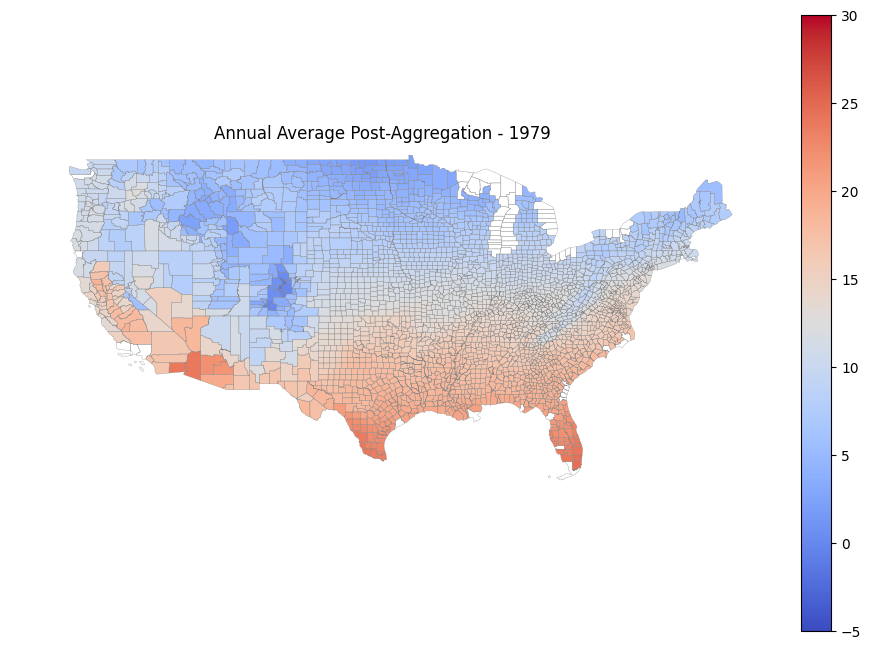

In [75]:
plot_climate_data(
    data=stagg_usa_data,  # Your original monthly county data DataFrame
    data_type='county',
    usa_counties=usa_counties,  # Your GeoDataFrame of US county boundaries
    column_name='order_1_daily_avg',
    start_year=1979,
    end_year=1979,
    title="Annual Average Post-Aggregation - 1979",
    value_min=-5,
    value_max=30,
    color_map="coolwarm",
    lon_bounds=(-130, -65),
    lat_bounds=(23, 50)
)

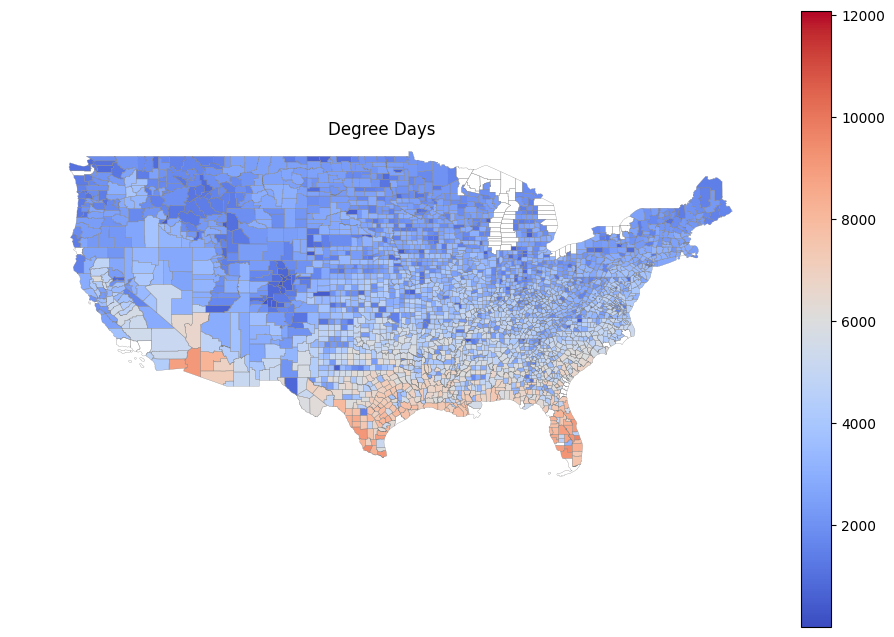

In [74]:
plot_climate_data(
    data=era5_dd_data,  # Your original monthly county data DataFrame
    data_type='county',
    usa_counties=usa_counties,  # Your GeoDataFrame of US county boundaries
    column_name='threshold_10_to_29',
    title="Degree Days",
    color_map="coolwarm",
    lon_bounds=(-130, -65),
    lat_bounds=(23, 50)
)

In [34]:
# Calculate annual average temperature per polygon (poly_id)
annual_avg = (
    stagg_usa_data.groupby(["poly_id", "year"])["order_1_daily_avg"]
    .mean()
    .reset_index()
)

# If you want to focus on a specific year (e.g., 1979), filter:
year_focus = 1979
annual_avg_year = annual_avg[annual_avg["year"] == year_focus]

usa_counties["GEOID"] = usa_counties["GEOID"].astype(int)
# Merge your data with the geodataframe
usa_counties = usa_counties.merge(
    annual_avg_year, how="left", left_on="GEOID", right_on="poly_id"
)

print(usa_counties)




     ID_1 ID_2  COUNTYNS  GEOID        NAME           NAMELSAD LSAD CLASSFP  \
0      01  001  00161526   1001     Autauga     Autauga County   06      H1   
1      01  003  00161527   1003     Baldwin     Baldwin County   06      H1   
2      01  005  00161528   1005     Barbour     Barbour County   06      H1   
3      01  007  00161529   1007        Bibb        Bibb County   06      H1   
4      01  009  00161530   1009      Blount      Blount County   06      H1   
...   ...  ...       ...    ...         ...                ...  ...     ...   
3223   72  151  01804556  72151     Yabucoa  Yabucoa Municipio   13      H1   
3224   72  153  01804557  72153       Yauco    Yauco Municipio   13      H1   
3225   78  010  02378248  78010   St. Croix   St. Croix Island   10      H4   
3226   78  020  02378249  78020    St. John    St. John Island   10      H4   
3227   78  030  02378250  78030  St. Thomas  St. Thomas Island   10      H4   

      MTFCC CSAFP  ... FUNCSTAT       ALAND      AW

'\n# Plot\nfig, ax = plt.subplots(1, 1, figsize=(12, 8))\nusa_counties.boundary.plot(ax=ax, color="gray", linewidth=0.2)\nusa_counties.plot(\n    column="order_1_daily_avg",\n    ax=ax,\n    cmap="coolwarm",\n    legend=True,\n    vmin=-5,  # min temperature for color scale\n    vmax=30,  # max temperature for color scale\n)\n\n# Set plot extents for mainland USA (approx.)\nax.set_xlim(-130, -65)\nax.set_ylim(23, 50)\n\nax.set_title(f"Annual Average Post-Aggregation - 1979- - {year_focus}")\nax.axis("off")\nplt.show()'

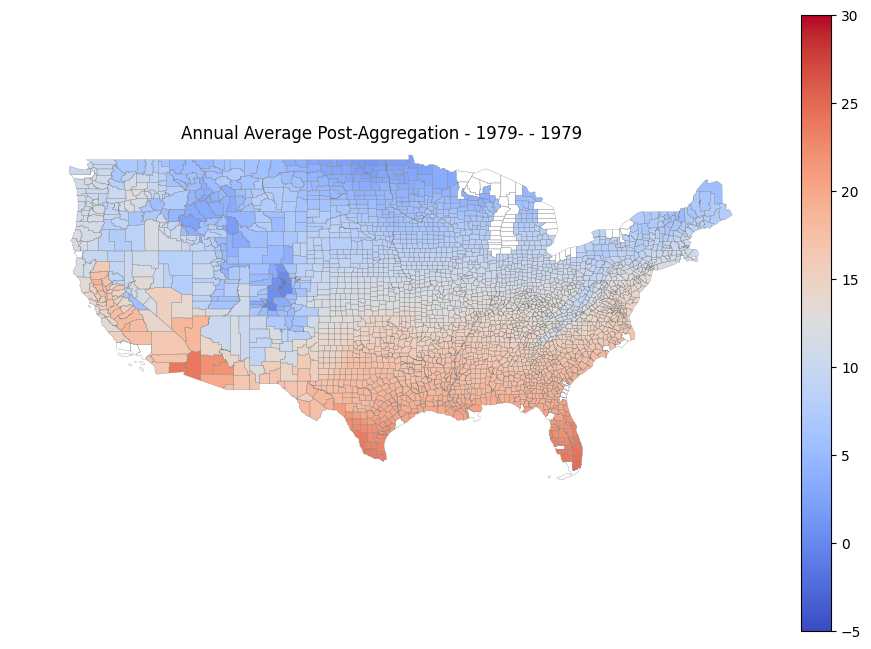

In [35]:


# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
usa_counties.boundary.plot(ax=ax, color="gray", linewidth=0.2)
usa_counties.plot(
    column="order_1_daily_avg",
    ax=ax,
    cmap="coolwarm",
    legend=True,
    vmin=-5,  # min temperature for color scale
    vmax=30,  # max temperature for color scale
)

# Set plot extents for mainland USA (approx.)
ax.set_xlim(-130, -65)
ax.set_ylim(23, 50)

ax.set_title(f"Annual Average Post-Aggregation - 1979- - {year_focus}")
ax.axis("off")
plt.show()

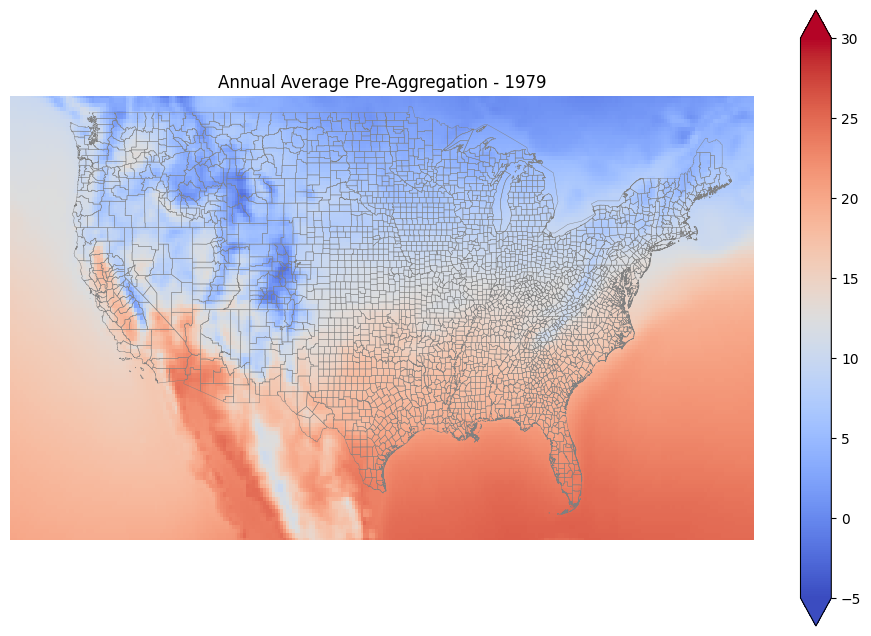

In [ ]:
# Shift longitudes from 0–360 to -180–180
rds = rds.assign_coords({"x": ((rds.x + 180) % 360) - 180}).sortby("x")

# Calculate the mean across bands → axis=0 for band dimension
annual_avg = rds.mean(dim="band", skipna=True)

# Convert from Kelvin to Celsius
annual_avg_celsius = annual_avg - 273.15

# Plot
fig, ax = plt.subplots(figsize=(12, 8))
annual_avg_celsius.plot(ax=ax, cmap="coolwarm", vmin=-5, vmax=30)
usa_counties.to_crs(annual_avg_celsius.rio.crs).boundary.plot(
    ax=ax, color="grey", linewidth=0.3
)

ax.set_xlim(-130, -65)
ax.set_ylim(23, 50)
ax.set_title("Annual Average Pre-Aggregation - 1979")
ax.axis("off")
plt.show()

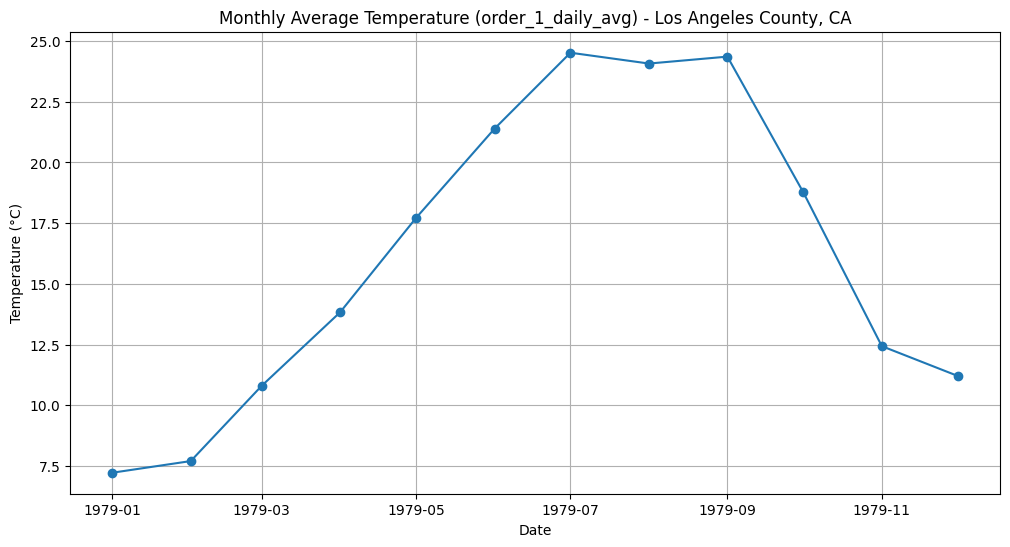

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Find Alameda county polygon ID directly by name
alameda_gid2 = usa_counties.loc[
    usa_counties["NAME_2"] == "Los Angeles", "GID_2"
].values[0]

# Filter stagg data for Alameda county
alameda_data = stagg_usa_data[stagg_usa_data["poly_id"] == alameda_gid2]

# Sort by year and month
alameda_data = alameda_data.sort_values(["year", "month"])

# Create a datetime column for plotting
alameda_data["date"] = pd.to_datetime(
    dict(year=alameda_data["year"], month=alameda_data["month"], day=1)
)

# Plot
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(
    alameda_data["date"], alameda_data["order_1_daily_avg"], marker="o", linestyle="-"
)

ax.set_title("Monthly Average Temperature (order_1_daily_avg) - Los Angeles County, CA")
ax.set_xlabel("Date")
ax.set_ylabel("Temperature (°C)")
ax.grid(True)

plt.show()


In [ ]:
stagg_usa_data
usa_counties

,GID_0,NAME_0,GID_1,NAME_1,NL_NAME_1,GID_2,NAME_2,VARNAME_2,NL_NAME_2,TYPE_2,...,geometry,poly_id_x,year_x,order_1_daily_avg_x,poly_id_y,year_y,order_1_daily_avg_y,poly_id,year,order_1_daily_avg
0,USA,United States,USA.1_1,Alabama,None,USA.1.1_1,Autauga,None,None,County,...,"POLYGON ((-86.81896 32.34027, -86.81084 32.347...",USA.1.1_1,1979.0,17.655739,USA.1.1_1,1979.0,17.655739,USA.1.1_1,1979.0,17.655739
1,USA,United States,USA.1_1,Alabama,None,USA.1.2_1,Baldwin,None,None,County,...,"MULTIPOLYGON (((-87.51056 30.33972, -87.51083 ...",USA.1.2_1,1979.0,19.261450,USA.1.2_1,1979.0,19.261450,USA.1.2_1,1979.0,19.261450
2,USA,United States,USA.1_1,Alabama,None,USA.1.3_1,Barbour,None,None,County,...,"POLYGON ((-85.13026 31.76386, -85.13504 31.768...",USA.1.3_1,1979.0,17.936807,USA.1.3_1,1979.0,17.936807,USA.1.3_1,1979.0,17.936807
3,USA,United States,USA.1_1,Alabama,None,USA.1.4_1,Bibb,None,None,County,...,"POLYGON ((-87.42078 32.87446, -87.42028 32.971...",USA.1.4_1,1979.0,17.345154,USA.1.4_1,1979.0,17.345154,USA.1.4_1,1979.0,17.345154
4,USA,United States,USA.1_1,Alabama,None,USA.1.5_1,Blount,None,None,County,...,"POLYGON ((-86.95322 33.81542, -86.95449 33.845...",USA.1.5_1,1979.0,16.236021,USA.1.5_1,1979.0,16.236021,USA.1.5_1,1979.0,16.236021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3143,USA,United States,USA.51_1,Wyoming,None,USA.51.19_1,Sweetwater,None,None,County,...,"POLYGON ((-110.00014 40.99923, -110.0485 40.99...",USA.51.19_1,1979.0,5.510439,USA.51.19_1,1979.0,5.510439,USA.51.19_1,1979.0,5.510439
3144,USA,United States,USA.51_1,Wyoming,None,USA.51.20_1,Teton,None,None,County,...,"POLYGON ((-111.04494 43.50049, -111.04498 43.5...",USA.51.20_1,1979.0,1.195070,USA.51.20_1,1979.0,1.195070,USA.51.20_1,1979.0,1.195070
3145,USA,United States,USA.51_1,Wyoming,None,USA.51.21_1,Uinta,None,None,County,...,"POLYGON ((-110.0485 40.99883, -110.05729 40.99...",USA.51.21_1,1979.0,4.888746,USA.51.21_1,1979.0,4.888746,USA.51.21_1,1979.0,4.888746
3146,USA,United States,USA.51_1,Wyoming,None,USA.51.22_1,Washakie,None,None,County,...,"POLYGON ((-107.10772 43.49963, -107.14559 43.4...",USA.51.22_1,1979.0,6.166563,USA.51.22_1,1979.0,6.166563,USA.51.22_1,1979.0,6.166563


# ------- 5. Plotting average across all years -------

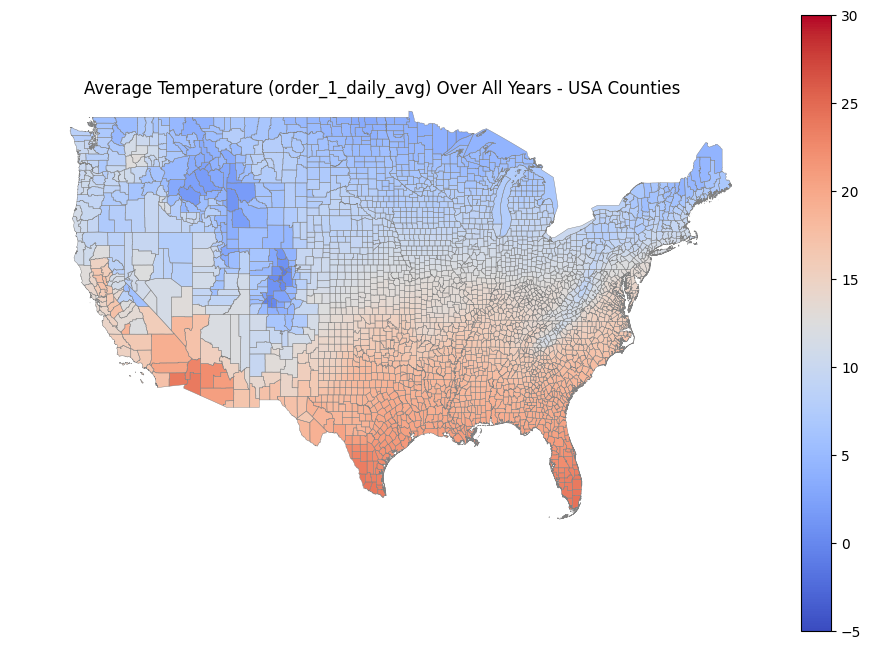

In [15]:
# Calculate average temperature per polygon (poly_id) over all years
annual_avg_all_years = (
    stagg_usa_data_allyrs.groupby("poly_id")["order_1_daily_avg"].mean().reset_index()
)

# Merge the averaged data with county GeoDataFrame
usa_counties_all_years = usa_counties.merge(
    annual_avg_all_years, how="left", left_on="GID_2", right_on="poly_id"
)

# Plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Grey county boundaries
usa_counties_all_years.boundary.plot(ax=ax, color="grey", linewidth=0.3)

# Plot average temperature with fixed scale
usa_counties_all_years.plot(
    column="order_1_daily_avg", ax=ax, cmap="coolwarm", legend=True, vmin=-5, vmax=30
)

# Zoom to mainland USA
ax.set_xlim(-130, -65)
ax.set_ylim(23, 50)

ax.set_title("Average Temperature (order_1_daily_avg) Over All Years - USA Counties")
ax.axis("off")
plt.show()


-180.0 179.75
[########################################] | 100% Completed | 18.88 s


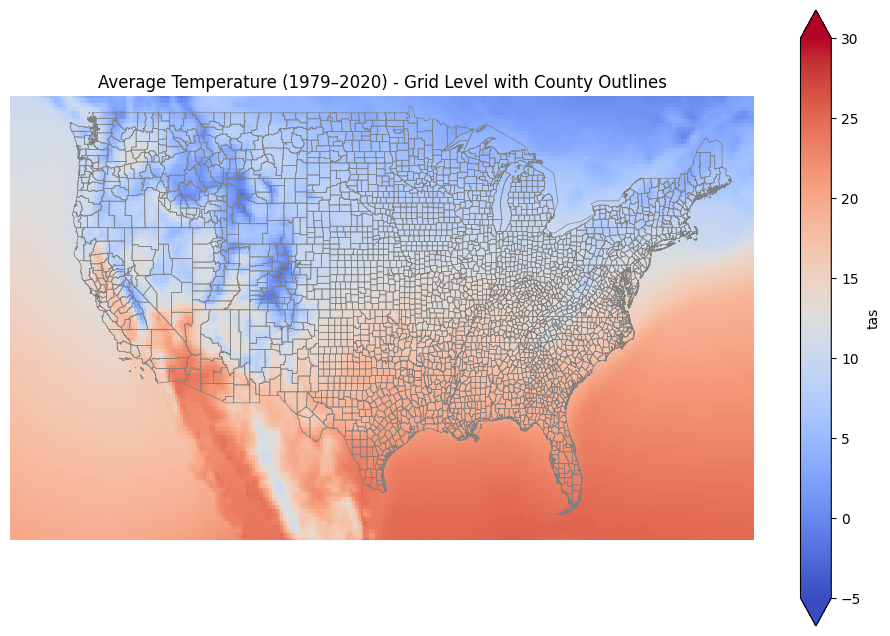

In [ ]:
# Plot raw data


# Concatenate along time dimension
gdnat_all = xr.concat([gdnat_1, gdnat_2], dim="time")

# Compute the mean over time dimension (lazy, waits until plot to compute)
annual_avg = gdnat_all["tas"].mean(dim="time", skipna=True)

# Convert to Celsius (assuming 'tas' is in Kelvin)
annual_avg_celsius = annual_avg - 273.15
annual_avg_celsius = annual_avg_celsius.rio.write_crs("EPSG:4326", inplace=True)

# Shift longitudes from 0–360 → -180–180, explicitly assigned
annual_avg_celsius = annual_avg_celsius.assign_coords(
    lon=(((annual_avg_celsius.lon + 180) % 360) - 180)
)

# Sort by longitude for proper plotting
annual_avg_celsius = annual_avg_celsius.sortby('lon')

# Confirm it worked:
# print(annual_avg_celsius.lon.values.min(), annual_avg_celsius.lon.values.max())

# Plot with progress bar for compute
with ProgressBar():
    fig, ax = plt.subplots(figsize=(12, 8))
    annual_avg_celsius.plot(ax=ax, cmap="coolwarm", vmin=-5, vmax=30)
    usa_counties.to_crs(annual_avg_celsius.rio.crs).boundary.plot(
        ax=ax, color="grey", linewidth=0.5
    )
    ax.set_xlim(-130, -65)
    ax.set_ylim(23, 50)
    ax.set_title("Average Temperature (1979–2020) - Grid Level with County Outlines")
    ax.axis("off")
    plt.show()
